<a href="https://colab.research.google.com/github/KhoaKD59/AI-in-Class-Mr.Thinh/blob/main/AI31032023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #Để chuyển thành one hot encoding
from keras.models import load_model
import numpy as np


In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

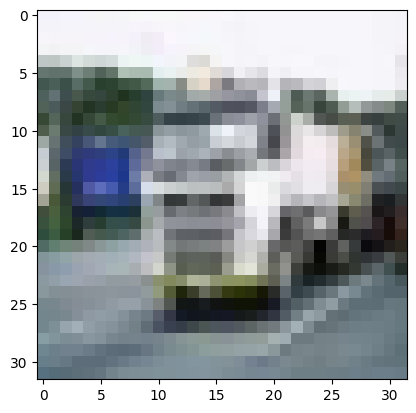

In [6]:
hinh = train_images[1000]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show

In [7]:
train_images = train_images.reshape((50000,32*32*3)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000, 32*32*3)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(50000, 3072)

In [8]:
train_labels = to_categorical(train_labels, 10) #One hot encoding
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [10]:
model = Sequential()
model.add(Dense(1000,input_shape = (32*32*3,), activation='relu', name="Layer_1"))
model.add(Dense(500, activation='relu', name="Layer_2"))
model.add(Dense(250, activation='relu', name="Layer_3"))
model.add(Dense(50, activation='relu', name="Layer_4"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 1000)              3073000   
                                                                 
 Layer_2 (Dense)             (None, 500)               500500    
                                                                 
 Layer_3 (Dense)             (None, 250)               125250    
                                                                 
 Layer_4 (Dense)             (None, 50)                12550     
                                                                 
 Output_layer (Dense)        (None, 10)                510       
                                                                 
Total params: 3,711,810
Trainable params: 3,711,810
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 38s 95ms/step - loss: 2.3386 - accuracy: 0.0973
Epoch 2/10
391/391 [==============================] - 34s 87ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 2.3027 - accuracy: 0.0994
Epoch 4/10
391/391 [==============================] - 36s 93ms/step - loss: 2.3027 - accuracy: 0.0975
Epoch 5/10
391/391 [==============================] - 35s 89ms/step - loss: 2.3027 - accuracy: 0.0974
Epoch 6/10
391/391 [==============================] - 31s 80ms/step - loss: 2.3027 - accuracy: 0.0967
Epoch 7/10
391/391 [==============================] - 33s 85ms/step - loss: 2.3027 - accuracy: 0.0988
Epoch 8/10
391/391 [==============================] - 32s 83ms/step - loss: 2.3027 - accuracy: 0.0978
Epoch 9/10
391/391 [==============================] - 33s 84ms/step - loss: 2.3027 - accuracy: 0.0963
Epoch 10/10
391/391 [==============================] - 31s 80ms/step - loss: 2.302

In [16]:
#evaluate
test_loss , test_acc = model.evaluate(test_images, test_labels)
print('Do mat mat :', test_loss)
print('Do chinh xac :', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 2.3026 - accuracy: 0.1000
Do mat mat : 2.302591323852539
Do chinh xac : 0.10000000149011612


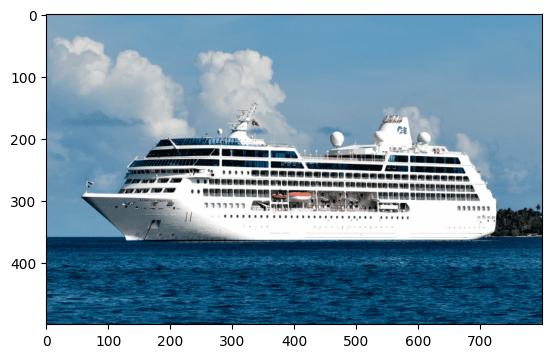

In [18]:
img = plt.imread('/content/ship.png')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 24ms/step


array([1])

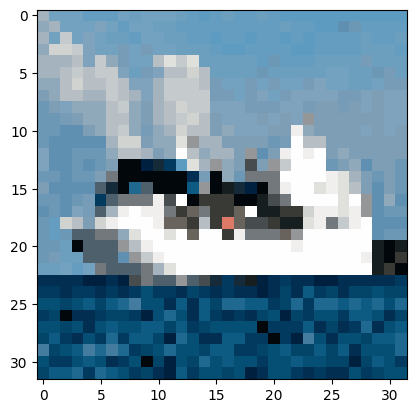

In [21]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img 
img = load_img('/content/ship.png', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)